In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
from tensorflow.keras.datasets import mnist

from my_ai_utils import *

In [ ]:
import matplotlib.pyplot as plt
def test(model, test_images, test_labels):
    # Prédictions sur quelques images
    predictions = model.predict(test_images)

    # Afficher quelques images avec leurs prédictions
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        plt.xlabel(f'Predicted: {tf.argmax(predictions[i])}, True: {tf.argmax(test_labels[i])}')
    plt.show()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = Processing.one_hot_encode(train_labels)
test_labels = Processing.one_hot_encode(test_labels)
print(train_images.shape, train_labels.shape)

In [ ]:
#np.random.seed(42)
model1 = Sequential(usage=Usage.multiClassification)
model1.add_layer(Flatten(input_shape=(28, 28)))
#model1.add_layer(BatchNormalization(28*28))
model1.add_layer(Dense(28*28, 128, activation="reLu"))
#model1.add_layer(BatchNormalization(128))
model1.add_layer(Dense(128, 16, activation="reLu"))
#model1.add_layer(BatchNormalization(16))
model1.add_layer(Dense(16, 10, activation="softmax", classes=[_ for _ in range(10)]))

# learning_rate schedulers
lr = CosineDecay(initial_lr=0.1, alpha=0.001, warmup=True, warmup_steps=100, hold_steps=200)
# lr = ExponentialDecay(initial_lr=0.2, decay_rate=0.2, warmup=True, warmup_steps=100, hold_steps=100)

model1.compile(loss_fn=Loss("categorical_cross_entropy"), optimizer=Adagrad(lr=0.01))
model1.summary()

#model1.cross_validate(k=3, train_X=train_images, train_Y=Processing.one_hot_encode(train_labels), nepochs=5, batch_size=256)

In [ ]:
### Reference test Tensorflow models
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiler le modèle
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['acc'])
model2.summary()

In [ ]:
# Entraîner le modèle
#history = model2.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data= (train_images, train_labels))

In [14]:
model1.train(train_images, train_labels, nepochs=5, batch_size=32, validation_data= (train_images, train_labels))
#model1.show_lr_evolution()

Training data dimensions:  (60000, 28, 28)
Epoch 1/5


100%|██████████| 1875/1875 [00:11<00:00, 157.54it/s, train_loss=0.0242, val_loss=0.0291, accuracy=0.926]


Epoch 2/5


100%|██████████| 1875/1875 [00:10<00:00, 171.97it/s, train_loss=0.0155, val_loss=0.0234, accuracy=0.942]


Epoch 3/5


100%|██████████| 1875/1875 [00:10<00:00, 187.03it/s, train_loss=0.0119, val_loss=0.0206, accuracy=0.949]


Epoch 4/5


100%|██████████| 1875/1875 [00:10<00:00, 184.15it/s, train_loss=0.00985, val_loss=0.0188, accuracy=0.954]


Epoch 5/5


100%|██████████| 1875/1875 [00:09<00:00, 195.11it/s, train_loss=0.00842, val_loss=0.0175, accuracy=0.957]


 accuracy: 0.9521  


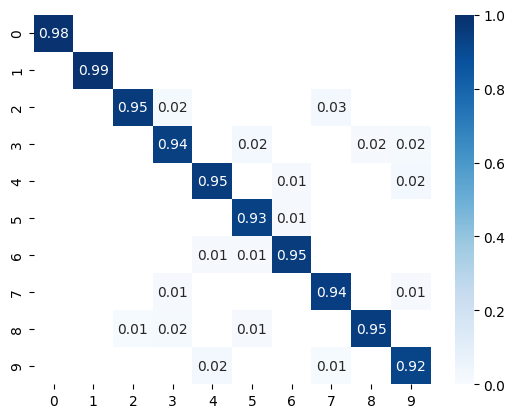

In [15]:
eval_metrics = model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step
 accuracy: 0.1033  


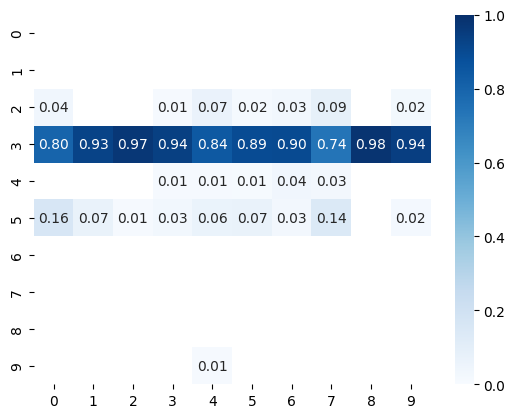

In [16]:
y_pred = model2.predict(test_images)
Accuracy(y_pred, test_labels, usage=Usage.multiClassification)
ConfusionMatrix(y_pred, test_labels, classes=[_ for _ in range(10)], usage=Usage.multiClassification)

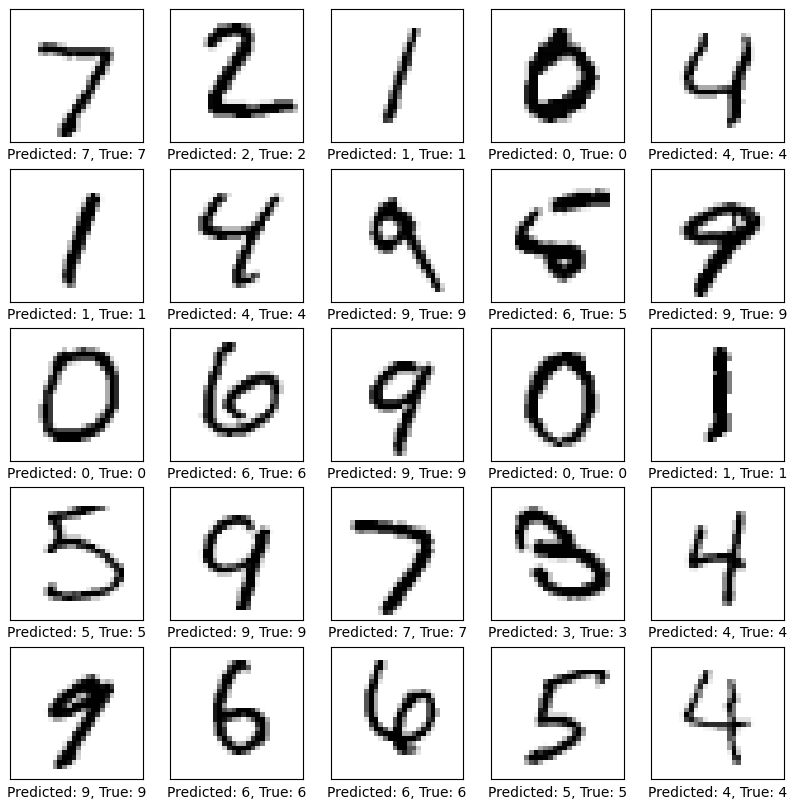

313/313 [==============================] - 1s 2ms/step


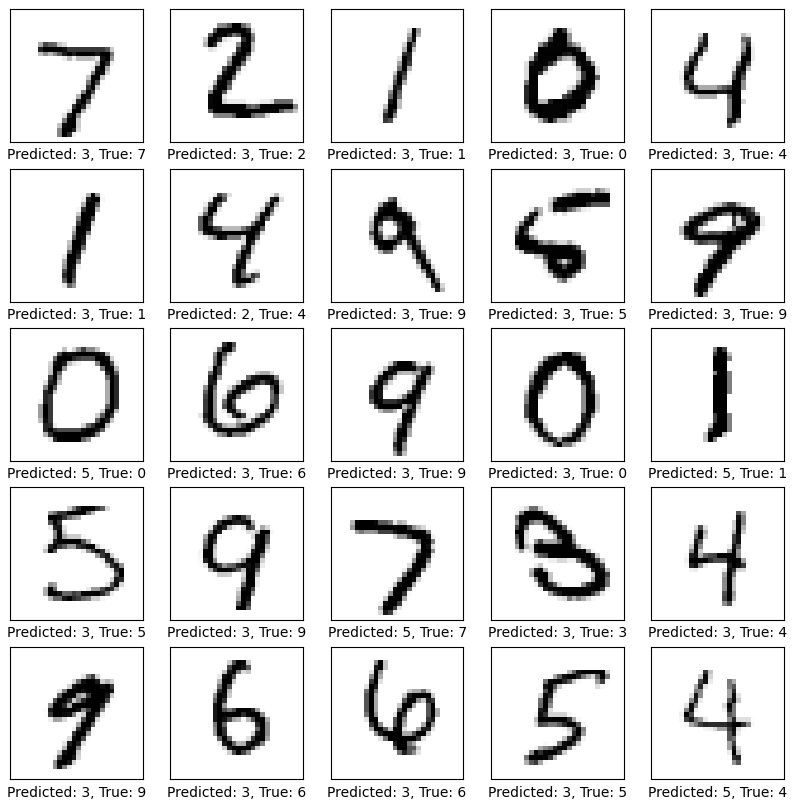

In [17]:
test(model1, test_images, test_labels)
test(model2, test_images, test_labels)